In [1084]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline 
import torchvision
import torch
from torchvision.transforms import transforms
import scipy

In [1080]:
data = torchvision.datasets.MNIST(root='',
                                        download=False, transform=transforms.ToTensor())
f_data = torchvision.datasets.FashionMNIST(root='',
                                        download=False, transform=transforms.ToTensor())

In [1081]:
mnist = (f_data[26][0].reshape((28,28)).numpy()*255).astype(np.uint8)


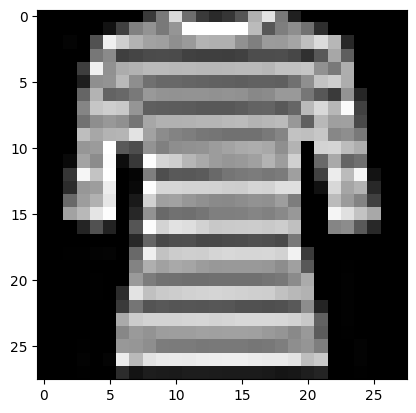

In [1082]:
plt.imshow(mnist, cmap="gray")

In [823]:
print(mnist)

[[  0   0   0   0   0   0   0   0  58 121 218 110  58  42  54  85 176 228
  121  33   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  18  66 129 148 121 149 254 255 255 255 255 187  87
  126 142 113  46   0   0   0   0   0   0]
 [  0   0   4   0  82 239 207 180 162 159 143 154 180 176 176 145 127 155
  154 165 191 219 183  41   0   0   0   0]
 [  0   0   0   0 119 138  63  69  75  76  75  65  63  63  62  66  77  77
   78  71  49  88 167  94   0   0   0   0]
 [  0   0   0  62 240 145 172 178 186 186 184 185 183 183 184 186 186 182
  193 193 197 145 121 174   0   0   0   0]
 [  0   0   0  30 143 147 185 142 112 104 104 101  99  98  96  94  98  98
   95 112 143 196 206 173   0   0   0   0]
 [  0   0   0 101 180  99 104 121 153 148 146 147 147 145 147 145 136 139
  153 153 118  87  58 148  38   0   0   0]
 [  0   0   0 133 198 206 201 149  95  93  92  91  88  88  88  92  99 100
   90 102 186 217 183 250  66   0   0   0]
 [  0   0   0 114 142 152 144 117 167 177 177 178 181 181 185 18

In [1137]:
conv_kernel = np.array([[1,2,1],
                      [2,4,2],
                      [1,2,1]])

conv_kernel = np.array([[0, 1/8, 0], 
                       [1/8, 4/5, 1/8],
                       [0, 1/8, 0]])

In [1150]:
result = cv2.filter2D(mnist, -1, conv_kernel/16)
result = scipy.ndimage.convolve(mnist_rot, conv_kernel)

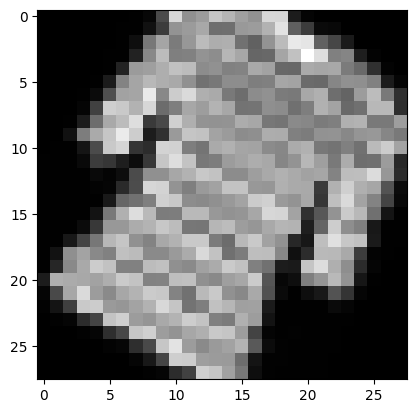

In [1151]:
plt.imshow(result, cmap="gray")

In [814]:
tb_in = open("output.txt", "w")
tb_in.write(str(mnist.reshape(784)[0]))
for entry in mnist.reshape(784)[1:]: 
    # print(entry)
    tb_in.write("\n" + str(entry))
tb_in.close()

### --- Testbench output ---

In [1101]:
tb_out = open("pic_out.txt", "r")
out = tb_out.read()
tb_out.close()

In [660]:
out = out.replace('x', '255')

In [1102]:
out_n = np.fromstring(out, sep = '\n')
out_n.shape

(676,)

In [1093]:
out_arr = (np.append(np.fromstring(out, sep = '\n'), np.zeros((676-653)))).reshape(26,26)

In [1104]:
out_arr = (np.fromstring(out, sep = '\n')).reshape(26,26)

Text(0.5, 1.0, 'Correct output')

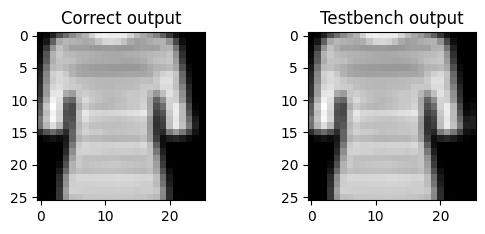

In [1105]:
ax1 = plt.subplot(222)
ax1.imshow(out_arr, cmap="gray")
ax1.set_title("Testbench output")
ax2 = plt.subplot(221)
ax2.imshow(result[1:-1, 2:], cmap="gray")
ax2.set_title("Correct output")

In [914]:
print("True:\n", result[1:-1, 2:])
print("TB:\n", out_arr)

True:
 [[  0   5  27  60  86 108 124 138 163 184 187 184 184 181 165 144 130 119
  101  76  44  16   2   0   0   0]
 [  1  18  75 130 142 137 135 130 135 152 165 167 163 150 132 123 127 133
  137 138 113  55  11   0   0   0]
 [  4  43 115 149 135 124 124 123 120 119 120 121 119 117 118 122 124 124
  125 137 138  90  25   0   0   0]
 [  9  65 138 155 145 142 139 138 136 134 132 131 131 133 135 136 139 142
  144 146 151 115  38   0   0   0]
 [ 13  72 135 151 150 148 140 136 134 133 132 131 130 129 129 130 134 142
  149 152 154 122  46   2   0   0]
 [ 22  89 144 149 142 135 128 124 122 121 120 119 119 118 118 119 123 131
  139 140 144 130  62   8   0   0]
 [ 30 105 161 168 156 139 129 127 127 126 126 126 127 128 129 129 129 132
  149 161 167 152  80  15   0   0]
 [ 34 109 158 168 164 155 148 146 144 143 142 142 143 143 144 146 148 147
  157 173 173 149  86  20   0   0]
 [ 40 119 166 172 162 158 156 149 145 143 142 142 144 145 145 147 156 157
  154 169 169 149 100  30   0   0]
 [ 41 120 17

### Image Augmentations

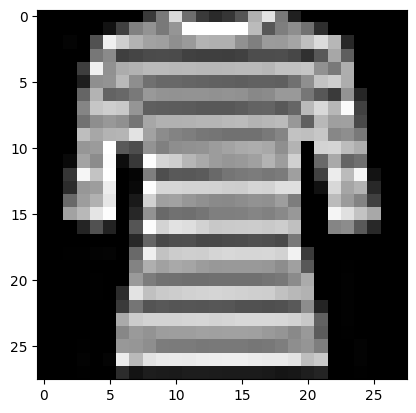

In [1145]:
mnist = (f_data[26][0].reshape((28,28)).numpy()*255).astype(np.uint8)
plt.imshow(mnist, cmap = 'grey')

In [1009]:
mnist_rot = np.zeros_like(mnist)
a = np.cos(np.deg2rad(-20))
b = np.sin(np.deg2rad(-20))
for x, row in enumerate(mnist):
    for y, el in enumerate(row):
        x_loc = x - 14
        y_loc = 14 - y 
        x_rot = np.round(a*x_loc - b*y_loc).astype(int) 
        y_rot = np.round(b*x_loc + a*y_loc).astype(int) 
        try:
            mnist_rot[x_rot+14, 14-y_rot] = el 
        except:
            continue

#### Inverse method!

In [1148]:
mnist_rot = np.zeros_like(mnist).astype(np.float64)
mnist_rot[:] = -1
a = np.cos(np.deg2rad(30))
b = np.sin(np.deg2rad(30))
for y_rot in range(28):
    for x_rot in range(28):
        x_loc = x_rot - 14
        y_loc = 14 - y_rot
        x = np.round(a*x_loc + b*y_loc).astype(int)
        y = np.round(-b*x_loc + a*y_loc).astype(int) 
        if (-14 <= x <= 14 and -14 <= y <= 14):
            try:
                mnist_rot[x_rot, y_rot] = mnist[14 + x, 14 - y]
            except:
                continue

In [1164]:
mnist_rot = np.zeros_like(mnist).astype(np.float64)
mnist_rot[:] = -1
a = 3547
b = 2048
for y_rot in range(28):
    for x_rot in range(28):
        x_loc = x_rot - 14
        y_loc = 14 - y_rot
        x = np.round((a*x_loc + b*y_loc) / 4096).astype(int)
        y = np.round((-b*x_loc + a*y_loc) / 4096).astype(int) 
        if (-14 <= x <= 14 and -14 <= y <= 14):
            try:
                mnist_rot[x_rot, y_rot] = mnist[14 + x, 14 - y]
            except:
                continue

In [1174]:
mnist_rot = np.zeros_like(mnist).astype(np.float64)
mnist_rot[:] = -1
a = 3547
b = 2048
for i in range(784):
    x_rot = i % 28;
    y_rot = np.floor(i / 28).astype(int);
    print('(', x_rot, ',', y_rot, ')')
    x_loc = x_rot - 14
    y_loc = 14 - y_rot
    x = np.round((a*x_loc + b*y_loc) / 4096).astype(int)
    y = np.round((-b*x_loc + a*y_loc) / 4096).astype(int) 
    if (-14 <= x <= 14 and -14 <= y <= 14):
        try:
            y_rot *
            mnist_rot[x_rot, y_rot] = mnist[14 + x, 14 - y]
        except:
            continue

( 0 , 0 )
( 1 , 0 )
( 2 , 0 )
( 3 , 0 )
( 4 , 0 )
( 5 , 0 )
( 6 , 0 )
( 7 , 0 )
( 8 , 0 )
( 9 , 0 )
( 10 , 0 )
( 11 , 0 )
( 12 , 0 )
( 13 , 0 )
( 14 , 0 )
( 15 , 0 )
( 16 , 0 )
( 17 , 0 )
( 18 , 0 )
( 19 , 0 )
( 20 , 0 )
( 21 , 0 )
( 22 , 0 )
( 23 , 0 )
( 24 , 0 )
( 25 , 0 )
( 26 , 0 )
( 27 , 0 )
( 0 , 1 )
( 1 , 1 )
( 2 , 1 )
( 3 , 1 )
( 4 , 1 )
( 5 , 1 )
( 6 , 1 )
( 7 , 1 )
( 8 , 1 )
( 9 , 1 )
( 10 , 1 )
( 11 , 1 )
( 12 , 1 )
( 13 , 1 )
( 14 , 1 )
( 15 , 1 )
( 16 , 1 )
( 17 , 1 )
( 18 , 1 )
( 19 , 1 )
( 20 , 1 )
( 21 , 1 )
( 22 , 1 )
( 23 , 1 )
( 24 , 1 )
( 25 , 1 )
( 26 , 1 )
( 27 , 1 )
( 0 , 2 )
( 1 , 2 )
( 2 , 2 )
( 3 , 2 )
( 4 , 2 )
( 5 , 2 )
( 6 , 2 )
( 7 , 2 )
( 8 , 2 )
( 9 , 2 )
( 10 , 2 )
( 11 , 2 )
( 12 , 2 )
( 13 , 2 )
( 14 , 2 )
( 15 , 2 )
( 16 , 2 )
( 17 , 2 )
( 18 , 2 )
( 19 , 2 )
( 20 , 2 )
( 21 , 2 )
( 22 , 2 )
( 23 , 2 )
( 24 , 2 )
( 25 , 2 )
( 26 , 2 )
( 27 , 2 )
( 0 , 3 )
( 1 , 3 )
( 2 , 3 )
( 3 , 3 )
( 4 , 3 )
( 5 , 3 )
( 6 , 3 )
( 7 , 3 )
( 8 , 3 )
( 9 , 3 )
( 10 ,

Text(0.5, 1.0, 'OG MNIST')

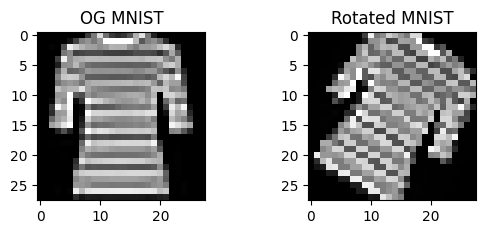

In [1176]:
ax1 = plt.subplot(222)
ax1.imshow(mnist_rot, cmap="gray")
ax1.set_title("Rotated MNIST")
ax2 = plt.subplot(221)
ax2.imshow(mnist, cmap="gray")
ax2.set_title("OG MNIST")

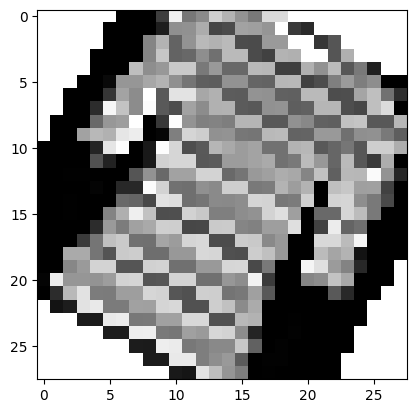

In [1152]:
import matplotlib
m_r = np.ma.masked_where(mnist_rot == -1, mnist_rot)
cmap.set_bad(color = 'white')
plt.imshow(m_r, cmap = 'grey')

In [1177]:
LUT = []
for i, el in enumerate(mnist.flatten()):
    bin = "10'b" + str(f"{i:b}")
    if (el == -1):
        data = "8'b0"
    else:
        data = "8'b" + str(f"{int(el):b}")
    line = bin + ': ' + 'pixel = ' + data + ';'
    print(line)
    

10'b0: pixel = 8'b0;
10'b1: pixel = 8'b0;
10'b10: pixel = 8'b0;
10'b11: pixel = 8'b0;
10'b100: pixel = 8'b0;
10'b101: pixel = 8'b0;
10'b110: pixel = 8'b0;
10'b111: pixel = 8'b0;
10'b1000: pixel = 8'b111010;
10'b1001: pixel = 8'b1111001;
10'b1010: pixel = 8'b11011010;
10'b1011: pixel = 8'b1101110;
10'b1100: pixel = 8'b111010;
10'b1101: pixel = 8'b101010;
10'b1110: pixel = 8'b110110;
10'b1111: pixel = 8'b1010101;
10'b10000: pixel = 8'b10110000;
10'b10001: pixel = 8'b11100100;
10'b10010: pixel = 8'b1111001;
10'b10011: pixel = 8'b100001;
10'b10100: pixel = 8'b0;
10'b10101: pixel = 8'b0;
10'b10110: pixel = 8'b0;
10'b10111: pixel = 8'b0;
10'b11000: pixel = 8'b0;
10'b11001: pixel = 8'b0;
10'b11010: pixel = 8'b0;
10'b11011: pixel = 8'b0;
10'b11100: pixel = 8'b0;
10'b11101: pixel = 8'b0;
10'b11110: pixel = 8'b0;
10'b11111: pixel = 8'b0;
10'b100000: pixel = 8'b0;
10'b100001: pixel = 8'b10010;
10'b100010: pixel = 8'b1000010;
10'b100011: pixel = 8'b10000001;
10'b100100: pixel = 8'b10010100;
10'b10

In [1178]:
ct_out = open("rot_out.txt", "r")
r_out = ct_out.read()
ct_out.close()

In [1183]:
out_arr = (np.fromstring(r_out, sep = '\n')[:784]).reshape(28,28)

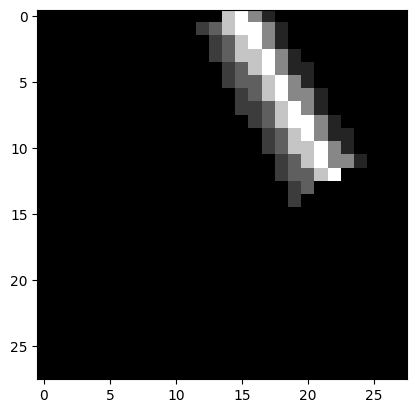

In [1184]:
plt.imshow(out_arr, cmap = 'grey')